# Lesson 09 Assignment 
Author: Ajai Shukla
Instructions

It is recommended you complete the lab exercises for this lesson before beginning the assignment.

Using the CIFAR-10 dataset (Links to an external site.), create a new notebook to build a TensorlLow model. Perform each of the following tasks and answer the related questions:

    Read CIFAR-10 dataset from Keras. (Links to an external site.)
    Explore data
    Preprocess and prepare data for classification
    Build a TensorFlow model using a single dense hidden layer
    Apply model to test set and evaluate accuracy
    Perform 3 adjusts to the number of layers and activation functions to improve accuracy
    Summarize your findings regarding the different iterations and any insights gained



Load Library

In [ ]:
from keras.datasets import cifar10
import time
import keras
import keras.utils
from keras import utils as np_utils
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from tensorflow.keras import backend as K
from matplotlib import pyplot
from tensorflow import keras
# Import Tensorflow with multiprocessing
import tensorflow as tf
import multiprocessing as mp
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.constraints import maxnorm
from keras.utils import np_utils
from keras.layers.noise import GaussianNoise
from keras.layers.advanced_activations import *
from keras.utils import plot_model
import pandas as pd
import matplotlib.pyplot as plt
import time, pickle
%matplotlib inline

The CIFAR-10 image classes are encoded as integers 0-9 by the following Python dictionary

In [7]:
nb_classes = 10
class_name = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck',
}

# Load training and test data

In [9]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = y_train.reshape(y_train.shape[0])  # somehow y_train comes as a 2D nx1 matrix
y_test = y_test.reshape(y_test.shape[0])

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'training samples')
print(X_test.shape[0], 'validation samples')

X_train shape: (50000, 32, 32, 3)
50000 training samples
10000 validation samples


# The original data of each image is a 32x32x3 matrix of integers from 0 to 255. We need to scale it down to floats in the unit interval


In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [11]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

Let's also write two small utilities for drawing samples of images, so we can inspect our results visually.

In [12]:
def draw_img(i):
    im = X_train[i]
    c = y_train[i]
    plt.imshow(im)
    plt.title("Class %d (%s)" % (c, class_name[c]))
    plt.axis('on')

def draw_sample(X, y, n, rows=4, cols=4, imfile=None, fontsize=12):
    for i in range(0, rows*cols):
        plt.subplot(rows, cols, i+1)
        im = X[n+i].reshape(32,32,3)
        plt.imshow(im, cmap='gnuplot2')
        plt.title("{}".format(class_name[y[n+i]]), fontsize=fontsize)
        plt.axis('off')
        plt.subplots_adjust(wspace=0.6, hspace=0.01)
        #plt.subplots_adjust(hspace=0.45, wspace=0.45)
        #plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    if imfile:
        plt.savefig(imfile)

Let's draw image 7 in X_train for example

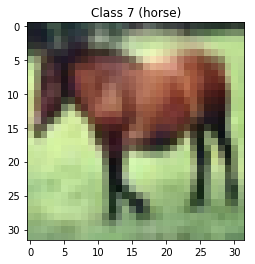

In [13]:
draw_img(7)

To test the second utility, let's draw the first 15 images in a 3x5 grid:

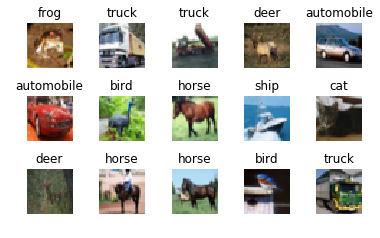

In [14]:
draw_sample(X_train, y_train, 0, 3, 5)

# Building Neural Networks for CIFAR-10
Model 1

In [15]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [33]:
nb_epoch = 50
batch_size = 32
import tensorflow as tf
model1 = keras.Sequential()
model1.add(keras.layers.Convolution2D(32,(3, 3), input_shape=(32, 32, 3), padding='same', activation='relu'))
model1.add(keras.layers.Dropout(0.2))
model1.add(keras.layers.Convolution2D(32,(3, 3), activation='relu', padding='same'))
model1.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(512, activation='relu'))
model1.add(keras.layers.Dropout(0.5))
model1.add(keras.layers.Dense(nb_classes, activation='softmax'))
# Compile model
lrate = 0.01
decay = lrate/nb_epoch
sgd = keras.optimizers.SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model1.compile(loss='sparse_categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model1.summary())



Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_14 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)             

In [34]:
print('Standard Training.')


Standard Training.


In [35]:
h = model1.fit(X_train, y_train, nb_epoch=nb_epoch, batch_size=batch_size, validation_data=(X_test, y_test))


W0911 10:14:34.294557 21620 training.py:686] The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 185s 4ms/sample - loss: 1.7667 - accuracy: 0.3616 - val_loss: 1.3870 - val_accuracy: 0.5064
Epoch 2/50
50000/50000 [==============================] - 188s 4ms/sample - loss: 1.4099 - accuracy: 0.4921 - val_loss: 1.2772 - val_accuracy: 0.5544
Epoch 3/50
50000/50000 [==============================] - 190s 4ms/sample - loss: 1.2144 - accuracy: 0.5666 - val_loss: 1.1266 - val_accuracy: 0.5980
Epoch 4/50
50000/50000 [==============================] - 182s 4ms/sample - loss: 1.0668 - accuracy: 0.6196 - val_loss: 1.0252 - val_accuracy: 0.6394
Epoch 5/50
50000/50000 [==============================] - 158s 3ms/sample - loss: 0.9517 - accuracy: 0.6632 - val_loss: 0.9927 - val_accuracy: 0.6551
Epoch 6/50
50000/50000 [==============================] - 129s 3ms/sample - loss: 0.8554 - accuracy: 0.6984 - val_loss: 0.9497 - val_accuracy: 0.6668
Epoch 7/50
50000/50000 [==========================

Training: accuracy   = 0.999560 loss = 0.005692
Validation: accuracy = 0.701400 loss = 1.426094
Over fitting score   = 0.236352
Under fitting score  = 0.191977

While the training accuracy was 99.96% , our validation data cis the only 70.14%. The almost 30% gap between the training data and validation data is a clear indication of overfitting, and a good reason to abandone model1 and look for a better one. We should also notice the clear big gap between the training loss and validation loss. This is also a clear mark f overfitting that should raise a warning sign.